## Example 1D simulation

The following is a 1D simulation including cosmic evolution. 
The source are modeled to be uniformly distributed and emit a mixed composition of H, He, N and Fe with a power-law spectrum and a charge dependent maximum energy.

In [3]:
from crpropa import *

# simulation setup
sim = ModuleList()
sim.add( SimplePropagation() )
sim.add( Redshift() )
sim.add( PhotoPionProduction(CMB) )
sim.add( PhotoPionProduction(IRB) )
sim.add( PhotoDisintegration(CMB) )
sim.add( PhotoDisintegration(IRB) )
sim.add( NuclearDecay() )
sim.add( ElectronPairProduction(CMB) )
sim.add( ElectronPairProduction(IRB) )
sim.add( MinimumEnergy( 1 * EeV) )

# observer
obs = Observer()
obs.add( ObserverPoint() )
sim.add( obs )

# output
output = TextOutput('events_sim1D.txt')
output.set1D(True)
output.printHeader()
obs.onDetection(output)

# source
source = Source()
source.add( SourceUniform1D(1 * Mpc, 1000 * Mpc) )
source.add( SourceRedshift1D() )

# power law spectrum with charge dependent maximum energy Z*100 EeV
# elements: H, He, N, Fe with equal abundances at constant energy per nucleon
composition = SourceComposition(1 * EeV, 100 * EeV, -1)
composition.add(1,  1,  1)  # H
composition.add(4,  2,  1)  # He-4
composition.add(14, 7,  1)  # N-14
composition.add(56, 26, 1)  # Fe-56
source.add( composition )

# run simulation
sim.setShowProgress(True)
sim.run(source, 10000, True)

### (Optional) Plotting

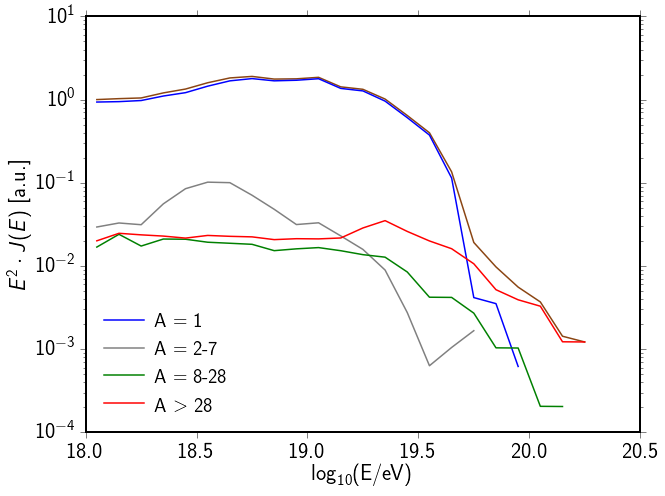

In [4]:
%matplotlib inline
from pylab import *

# load events
d = genfromtxt('events_sim1D.txt', names=True)

# observed quantities
Z = array([chargeNumber(id) for id in d['ID'].astype(int)])
A = array([massNumber(id) for id in d['ID'].astype(int)])
lE = log10(d['E']) + 18  # energy in log10(E/eV))

lEbins = arange(18, 20.51, 0.1)
lEcens = (lEbins[1:] + lEbins[:-1]) / 2

# identify mass groups
idx1 = A == 1
idx2 = (A > 1) * (A <= 7)
idx3 = (A > 7) * (A <= 28)
idx4 = (A > 28)

# scaled histogram
scale = lEcens**-1
J  = histogram(lE, bins=lEbins)[0] * scale
J1 = histogram(lE[idx1], bins=lEbins)[0] * scale
J2 = histogram(lE[idx2], bins=lEbins)[0] * scale
J3 = histogram(lE[idx3], bins=lEbins)[0] * scale
J4 = histogram(lE[idx4], bins=lEbins)[0] * scale

# normalize
J1 /= J[0]
J2 /= J[0]
J3 /= J[0]
J4 /= J[0]
J /= J[0]

figure(figsize=(10,7))
plot(lEcens, J,  lw=1.5, c='SaddleBrown')
plot(lEcens, J1, lw=1.5, c='blue', label='A = 1')
plot(lEcens, J2, lw=1.5, c='grey', label='A = 2-7')
plot(lEcens, J3, lw=1.5, c='green', label='A = 8-28')
plot(lEcens, J4, lw=1.5, c='red', label='A $>$ 28')
legend(loc='lower left', fontsize=20)
semilogy()
ylabel('$E^{2} \cdot J(E)$ [a.u.]')
xlabel('$\log_{10}$(E/eV)')
savefig('sim1D_spectrum.png')